## 知识点
1. Counter()初始化生成一个dict，每个元素是key，元素出现的次数是value
2. Counter.most_common(n) 永远只会返回第一个value最大的item
3. Counter本身是一个dict，在python3.6以后这个dict是内部排序的
2. dict 中的每一个元素属于dict.items()，如果单独寻找key使用dict.keys()，如果单独寻找value使用dict.values()
3. with open(file_path, module='rwf') as f: for line in f:
4. python 内置字符串处理函数

In [26]:
from collections import Counter
import os

# print(os.path.abspath(''))
f_path = './counter-test.doc'

c = Counter()
thresholds = 1000

with open(f_path,'r') as f:
    for line in f:
        c.update(line.rstrip().lower())

for key, value in c.items() :
    if(value>thresholds):
        print("key: ", key, " value: ", value)

key:  \  value:  4751
key:  r  value:  2408
key:  t  value:  2078
key:  f  value:  1324
key:     value:  6378
key:  a  value:  2339
key:  n  value:  1606
key:  s  value:  1635
key:  i  value:  2530
key:  c  value:  2132
key:  p  value:  1187
key:  0  value:  1401
key:  d  value:  1827
key:  e  value:  1824
key:  h  value:  2317
key:  l  value:  2588
key:  o  value:  1402


In [24]:
c.most_common(1)[0]

(' ', 6378)

## knn 简单编程
1. 假设数据的格式
    > data = [data_x, data_y] <br>
    > label = [label] <br>
2. knn判断过程
    > 1. 找到最近的k个点 <br>
    > 2. 在这k个点中选举出数量最多的标签 <br>
    > 3. 如果标签一样多，扩大k值，直到选出绝对多数 <br>
    > 4. 如果用尽所有点绝对多数有持平，那么选择标签最小的 <br>
    

### find_max

In [1]:
import numpy as np
from matplotlib import pyplot
from collections import Counter

def find_max(label):
    '''
    input: []; k nearest labels
    output: []; maximum label
    '''
    m_label = []
    
    c_label = Counter(label)
    # find max value of current labels, could be more than one label
    l_max=max(c_label.values())
    for key, value in c_label.items():
        if value == l_max:
            m_label.append(key)
        else:
            continue
    return m_label

In [36]:
# test of find_max
data = []
label = [3,3,3,5,5,7,7,7,7,7,2,2,2,2,2,0,0,0,0,0]
find_max(data,label)

[7, 2, 0]

### distance

In [17]:
from math import sqrt

def distance(d0, d1):
    '''
    calculate distance between two data points
    
    input: 2d tuple & 2d tuple; two tuples
    output: one number; distance
    '''
    return sqrt(np.sum((d0-d1)*(d0-d1),axis=0))

In [18]:
# test of distance
d0 = np.asarray((2.4, 5.1),dtype=np.float32)
d1 = np.asarray((6.9, 2.7),dtype=np.float32)
distance(d0,d1)

5.099999835444429

### pop_over_dist

In [ ]:
# customize one pop function

def pop_over_dist(l, max):
    '''
    pop item according to setting value 
    input: list and setting value
    output: popped item
    function pop out item from given list
    '''
    popped = (0,0,0)
    for idx,(a,b,c) in enumerate(l):
        if b == max:
            popped = l.pop(idx)
    return popped

In [89]:
l = [(2, 3, 4), (5, 4, 6), (7, 3, 1), (6, 10, 12)]
pop_over_dist(l, 10)
print(l)

[(2, 3, 4), (5, 4, 6), (7, 3, 1)]


### find_maximum_dist

In [5]:
# find maximum distance in cluster

def find_maximum_dist(l):
    '''
    find maximum distance over cluster
    input: list 
    output: maximum distance
    '''
    max_dist = 0
    for (dat,dist,idx) in l:
        if dist >= max_dist:
            max_dist = dist
    return max_dist    

In [104]:
# test find_maximum_dist

find_maximum_dist(l)

4

### find_k_nearest

In [29]:
def find_k_nearest(data, pt, k):
    '''
    input: data, point for classification, k for number of classes
    output: k nearest point
    '''
    # list storing k-nearest points and its corresponding idx
    # this k_nearest should be a tuple list: (data,distance,idx)
    k_nearest = []
    # first put k points into cluster, sort cluster
    # then find the maximum distance of these k point
    # if new distance is smaller than the maximum, pop the maximum-distance point and put in this new point
    # the number of members of this cluster is always k
    k_maximum_dis = 0
    for (idx,pts) in enumerate(data):
        # first put k points into cluster
        dist = distance(pts, pt)
        # print("this distance is: ", dist)
        if idx < k:          
            k_nearest.append((pts,dist,idx))
            # find the maximum distance of this cluster
            k_maximum_dis = find_maximum_dist(k_nearest)
        else:
            # put in points that is smaller than the maximum distance 
            # then pop out points with maximum distance
            # one exception: if they are of the same distance, keep both
            if dist < k_maximum_dis:
                pop_over_dist(k_nearest, k_maximum_dis)
                k_nearest.append((pts, dist, idx))
                k_maximum_dis = find_maximum_dist(k_nearest)
            elif dist == k_maximum_dis:
                k_nearest.append((pts, dist, idx))
            else:
                continue
    return k_nearest

In [30]:
sigma = 10
miu = 5
data = (sigma * np.random.randn(100,)+ miu).reshape(50,2)
target = np.asarray((3,2),dtype=np.float32)
find_k_nearest(data, target, 5)

[(array([1.70575908, 4.30614891]), 2.6445003972655443, 9),
 (array([ 2.38280076, -1.54101043]), 3.5943969944164653, 38),
 (array([0.51791173, 5.40115406]), 4.210535730363436, 40),
 (array([ 5.44236549, -2.18812716]), 4.848253116293, 46),
 (array([3.06536602, 4.98375305]), 2.9844689590869953, 47)]

### vote

In [58]:
# vote maximum label

def vote(data, label, target, k):
    '''
    find which cluster this new point should belong
    using voting
    input: 
        data -> labelled points
        label -> labels of points
        point -> target point waiting for classification  
        k -> number of nearest points
    output: class
    '''
    # label_list containing corresponding label via the same index between data and label
    label_list = []
    # pts is 3d tuple (point, distance, index)
    pts = find_k_nearest(data, target , k)
    for (_,_,idx) in pts:
        label_list.append(label[idx])
    # find maximum number of label
    max_label = find_max(label_list)
    # if we have more than one maximum number of label
    if len(max_label) >= 2 and k<= len(data)/2:
        vote(data, label, target, k+1)
    else:
        return max_label

In [133]:
# generate lable with some dumb methods
def label_gen_func(shape,k):
    '''
    generate k-class label
    input: 
        shape -> shape of label list
        k -> k classes
    output: label list
    '''
    label = []
    raw_num = np.random.randint(0,100,shape).tolist()
    for idx,num in enumerate(raw_num):
        for i in range(k):
            if num <= (i+1) * 100/k:
                label.append(i)
                raw_num[idx] = 1000
                break
    return label

In [177]:
res = label_gen_func(50,5)
print(res)
print(len(res))

[2, 0, 2, 4, 4, 3, 2, 3, 3, 2, 2, 1, 1, 4, 3, 3, 1, 0, 1, 3, 0, 4, 0, 3, 4, 4, 4, 4, 1, 3, 4, 0, 3, 1, 0, 0, 3, 4, 2, 3, 2, 2, 2, 3, 1, 3, 2, 4, 3, 1]
50


In [239]:
# final test with small number of data
k = 5
sigma = 10
miu = 5
data = (sigma * np.random.randn(100,)+ miu).reshape(50,2)
label = label_gen_func(50,5)
target = np.asarray((3,2),dtype=np.float32)
target_lab = vote(data, label, target, k)
print(target_lab)

[0]


### visualization

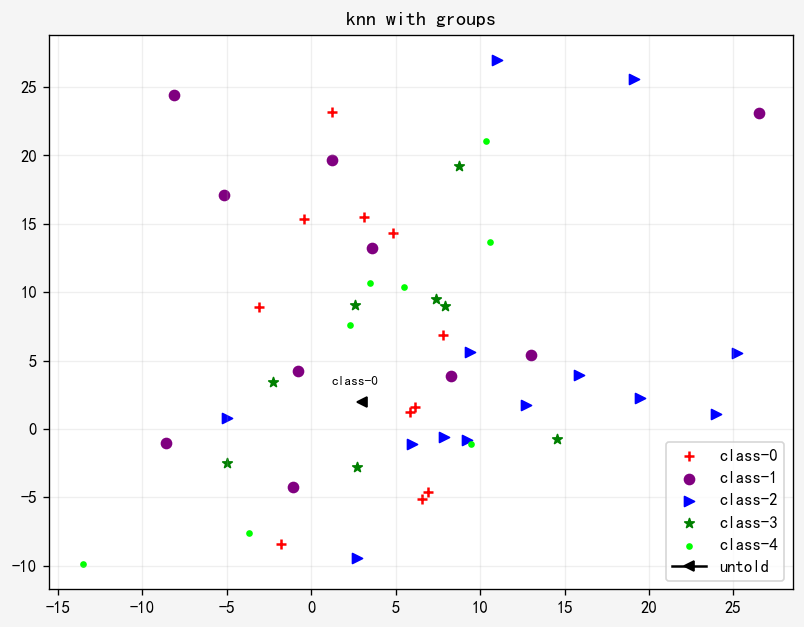

In [240]:
from matplotlib import pyplot as plt
import matplotlib


plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

colors = ['red', 'purple', 'blue', 'green', 'lime']
shapes = ['+', 'o', '>', '*', '.']


# create 5 different list containing 5 classes of points
upper_list = []
for i in range(k):
    new_list = []
    upper_list.append(new_list)
# assign each point into its corresponding class
data_with_lab = zip(data, label)


for dat, lab in data_with_lab:
    for i in range(k): 
        if lab == i:
            upper_list[i].append(dat.tolist())
            
fig, ax = plt.subplots(1,1,facecolor='whitesmoke',edgecolor='grey',
                       dpi=120,figsize=(8,6))
#fig.suptitle("knn results visualization",fontsize=18, color='red')
ax.set_title('knn with groups')

for i in range(k):
    ax.scatter(np.array(upper_list[i])[:,0],
               np.array(upper_list[i])[:,1],
               color=colors[i], 
               marker=shapes[i],
               label="class-"+str(i))

# plot the unassigned point
ax.plot(target[0],target[1],color='black',marker='<',label="untold")
ax.text(target[0]-1.8,target[1]+1.2,
        'class-'+str(target_lab[0]),
        fontsize=8)

ax.legend()
ax.grid(alpha=0.2)

## 总结
1. np.array() 或是 np.asarray() 能够将list转换为ndarray，便于操作
2. python中的zip是位置上的一对一重组，并且组合后成为tuple，其中的二者仍旧保持着独立的关系，能够使用for进行拆包
3. pyplot之中rcParam属性
4. 使用上位list嵌套下位list的方法能够按照需求建立k个list进行元素的放置

## sklearn knn
1. sklearn.neighbors KNeighborsClassifier
    > classifier  算法中有两个需要指定方法的部分 <br>
    > 首先是如何从所有最近点中选举出未知点的标签，体现在weights参数上 <br>
    > 其次是如何选举出最近的k个点，体现在algorithm以及leaf_size参数对上 <br>
    > 最后是如何计算距离， 体现在metric以及metrix_param参数上 <br>
    > n_neighbors参数是必须的 <br>

In [259]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [261]:
data_iris = iris.data
label_iris = iris.target
properties_iris = iris.feature_names
names_iris = iris.target_names

# split raw data and label into train and test set
data_iris_train, data_iris_test, label_iris_train, label_iris_test  \
    = train_test_split(data_iris, label_iris, test_size=0.2)
# scale feature into standard normalized pattern
scaler = StandardScaler()
scaler.fit(data_iris)
data_iris_train_sca = scaler.transform(data_iris_train)
data_iris_test_sca = scaler.transform(data_iris_test)
# initiate KNN learning module
classifier = KNeighborsClassifier(n_neighbors=5)
# feed triaining data into
classifier.fit(data_iris_train_sca, label_iris_train)
# predict test data and estimate efficiency of module
label_iris_pred = classifier.predict(data_iris_test)
print(confusion_matrix(label_iris_test,label_iris_pred))
print(classification_report(label_iris_test,label_iris_pred))

[[ 0  0 13]
 [ 0  0  8]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         8
           2       0.30      1.00      0.46         9

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [265]:
# evaluate error rate with the expansion of k
error = []
for i in range(41):
    knn_classifier = KNeighborsClassifier(n_neighbors=i+1)
    knn_classifier.fit(data_iris_train_sca, label_iris_train)
    label_iris_pred_k = knn_classifier.predict(data_iris_test_sca)
    error.append(np.mean(label_iris_pred_k != label_iris_test))

[0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.1,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.1,
 0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.13333333333333333,
 0.1,
 0.13333333333333333,
 0.13333333333333333]